In [1]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec as gridspec
import dill

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
sparse_sessions = stx.ymaze_sess_deets.SparseKO_sessions

In [3]:
sparse_sessions.keys()

dict_keys(['SparseKO_05', 'SparseKO_02', 'SparseKO_03'])

In [4]:
mouse = 'SparseKO_02'
d = sparse_sessions[mouse][-1]
print(d)

{'date': '22_11_2024', 'scene': 'YMaze_LNovel_LongTimeout', 'session': 2, 'scan': 15, 'novel_arm': -1, 'exp_day': 7}


In [5]:
date, scene, sess, scan = d['date'], d['scene'], d['session'], d['scan']
print(scene)
basedir = f'/mnt/BigDisk/2P_scratch/{mouse}/{date}/{scene}'
stem =  os.path.join(basedir, f'{scene}_{sess:03}_{scan:03}')

d.update({'mouse': mouse ,
          'scan_file':stem + '.sbx',
          'scanheader_file': stem + '.mat',
          'vr_filename': os.path.join("/mnt/BigDisk/VR_scratch",mouse,date,"%s_%d.sqlite" %(scene,sess)),
          'scan_number': scan,
          'prompt_for_keys': False,
          'VR_only': False,
          'scanner': "NLW",
          'n_channels':2,
             })

YMaze_LNovel_LongTimeout


In [6]:
sess = stx.session.YMazeSession(**d)
sess.load_scan_info(sbx_version=3)
sess.align_VR_to_2P()
sess.load_suite2p_data(which_ts=('F', 'Fneu','spks'))
sess.get_trial_info()
sess.neuropil_corrected_dff()

Fixing teleports
frame rate 15.625
(297154,) ttl times,(64134,) ca2+ frame times
last time: VR 4104.64675, ca2+ 4104.512


/home/mplitt/repos/TwoPUtils/TwoPUtils/preprocessing.py:210: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ca_df.loc[:, 'time'] = ca_time
/home/mplitt/repos/TwoPUtils/TwoPUtils/preprocessing.py:259: UserWarning: Number of teleports and trial starts don't match
  warnings.warn("Number of teleports and trial starts don't match")
/home/mplitt/repos/TwoPUtils/TwoPUtils/preprocessing.py:265: UserWarning: One more trial start than teleport, assuming the final teleport got chopped
  warnings.warn(('One more trial start than teleport, assuming the final teleport got chopped'))


/mnt/BigDisk/2P_scratch/SparseKO_02/22_11_2024/YMaze_LNovel_LongTimeout/YMaze_LNovel_LongTimeout_002_015/suite2p
194 7868
8966 15579
16674 24296
25397 33097
34195 40977
42077 49606
50701 57026
58118 64133


In [7]:
sess.timeseries.keys()

dict_keys(['F', 'Fneu', 'spks', 'F_dff'])

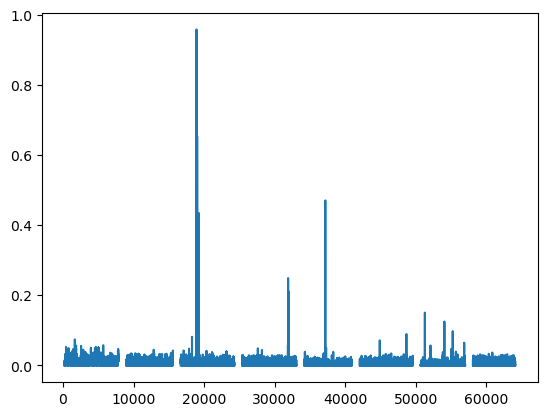

In [12]:
fig, ax = plt.subplots()
# ax.imshow(sess.timeseries['spks'],aspect='auto')
ax.plot(sess.timeseries['spks'][0,:])